<a href="https://colab.research.google.com/github/itsmesudhanshu/netfix-tv-showunsupervisedproject/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Netflix Movies and TV Shows Clustering**

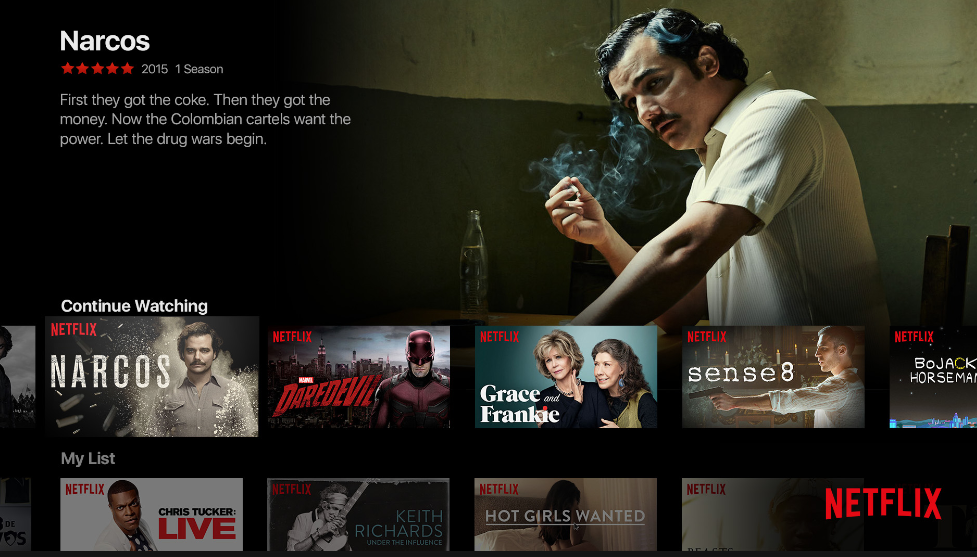

##**Project Type - Unsupervised learning**
##**Contribution**- Team

Team Member 1- Sudhanshu Chouhan

Team Member 2- Kapil Narayan Singh



#**Project Summary**
In this project we are going to analyse the viewing patten of watchers across the globe on netflix platform which has become a sensatation in last decade. We will first do EDA analysis and get to know about the various facts which is crucial for our general obeservation and new trends in the market.Then we will divide the  data into cluster by applying various Unsupervised Learning algorithm then we will look out the conclusion from analysis at the end of the project, 

#**GitHub Link -**
**Kapil Narayan Singh - https://github.com/KapilNarayanSingh/Netflix-Movies-and-TV-shows-clustering---Unsupervised-ML**

**Sudhanshu Chouhan -https://github.com/itsmesudhanshu/netfix-tv-showunsupervisedproject**

#**Problem Statement**
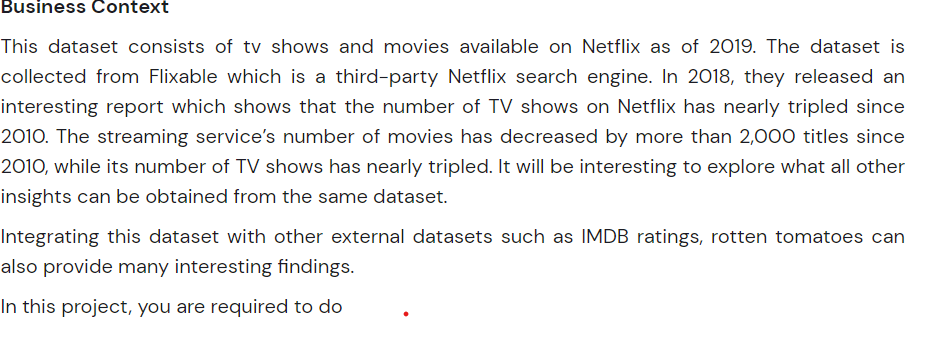
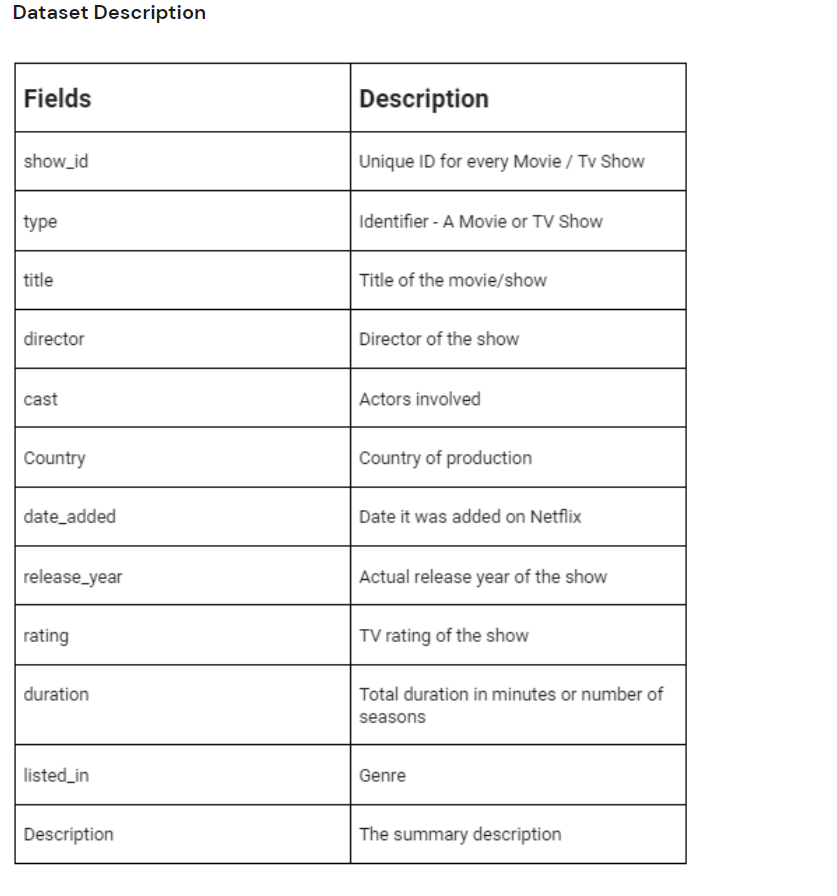

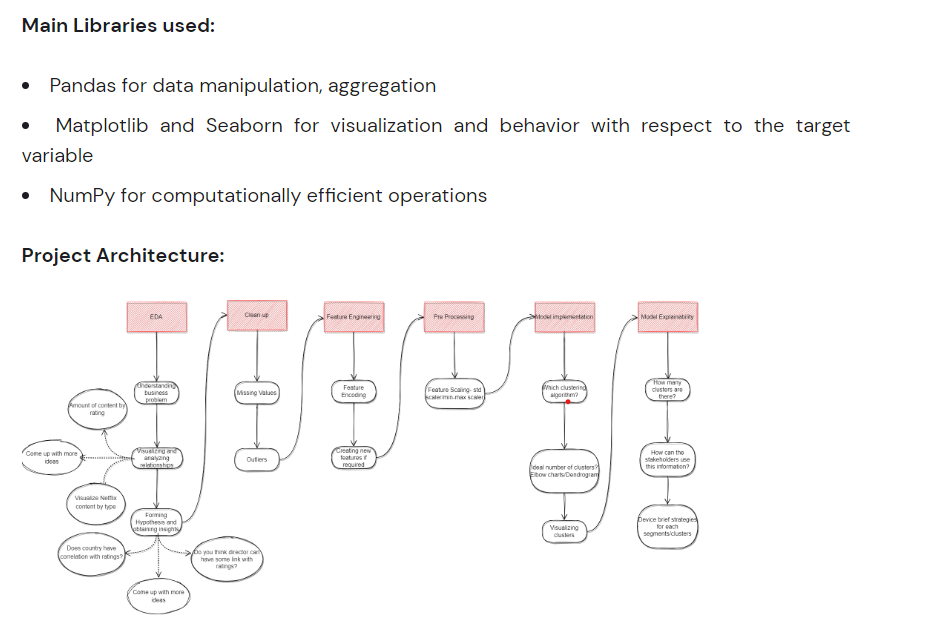

#**Let's Begin !**

##**1. Know Your Data**

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix_df = pd.read_csv('/content/drive/MyDrive/netflix tv and show/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
netflix_df.shape

(7787, 12)

In [11]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
netflix_df.duplicated().sum()

0

There are no duplicated values

In [13]:
new_netflix_df=netflix_df.copy()

In [14]:
new_netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
new_netflix_df.isnull().sum()/new_netflix_df.shape[0]

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

From this we can conclude that director has the highest amount of missing values followed by cast, country,date added and rating respectively.

In [16]:

#total null values
new_netflix_df.isnull().sum().sum()

3631

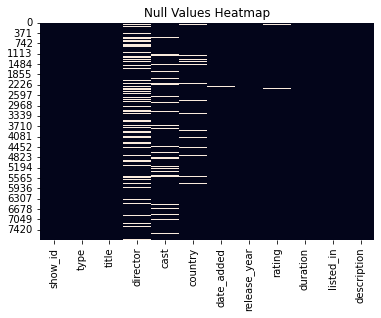

In [17]:
sns.heatmap(new_netflix_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

The observation shows that maximum number of null value is Director followed by Cast and then in Country . Rating have 7  null value .  

In [18]:
#Handling Null Values
new_netflix_df['cast'].fillna(value='No cast',inplace=True)
new_netflix_df['country'].fillna(value=new_netflix_df['country'].mode()[0],inplace=True)
new_netflix_df.dropna(subset=['date_added','rating'],inplace=True)
new_netflix_df.drop(['director'],axis=1,inplace=True)

In [19]:
new_netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
new_netflix_df.select_dtypes(include=['int64','float64'])

,release_year
0,2020
1,2016
2,2011
3,2009
4,2008
...,...
7782,2005
7783,2015
7784,2019
7785,2019


#** Exploratory Analysis and Visualization **

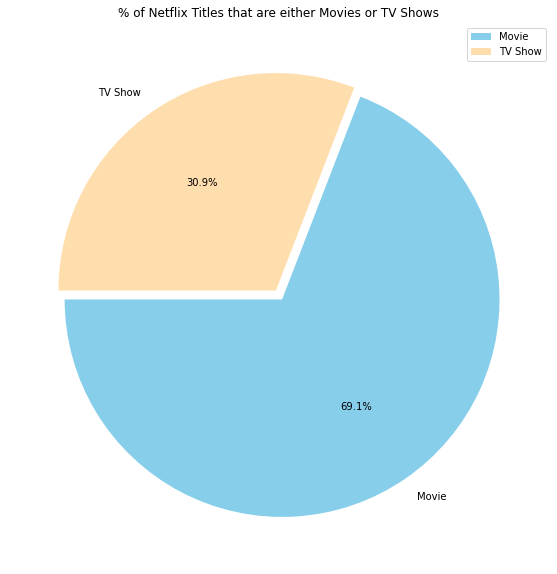

In [21]:
plt.figure(figsize=(20,10))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(new_netflix_df.type.value_counts(), explode=(0.025,0.025), labels=new_netflix_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

The above observation shows that TV shows are less in number than that of Movies 

In [22]:
#Movie Ratings based on Target Age Groups
new_netflix_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [23]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
new_netflix_df['target_ages'] = new_netflix_df['rating'].replace(ratings)


In [24]:
new_netflix_df['type'] = pd.Categorical(new_netflix_df['type'])

# target_ages is another category (4 classes)
new_netflix_df['target_ages'] = pd.Categorical(new_netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [25]:
tv_shows=new_netflix_df[new_netflix_df['type']=='TV Show']
movies=new_netflix_df[new_netflix_df['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

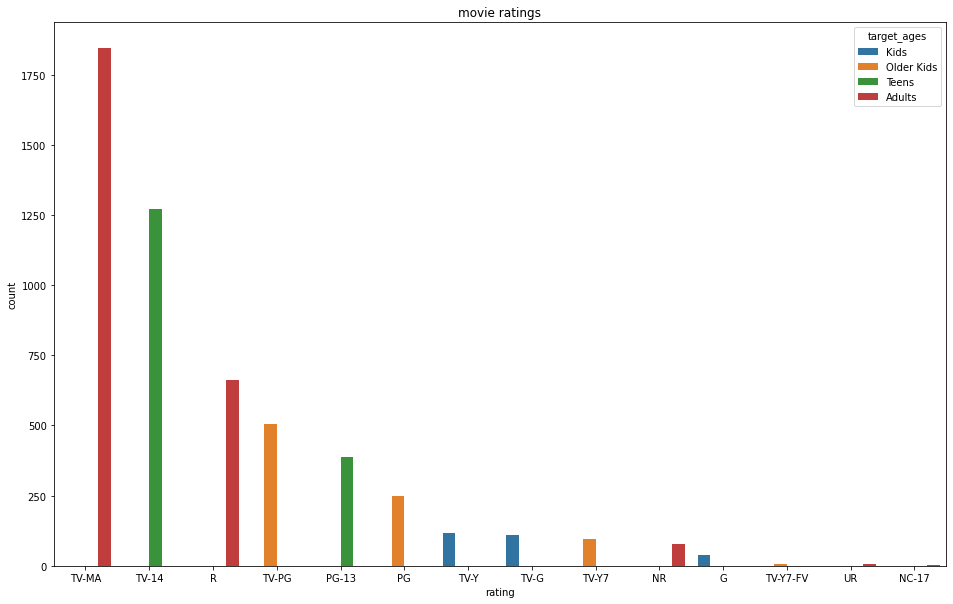

In [26]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(16,10))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

Movie rating based on target age group show that the rating of TV-MA( Mature Audiences ) has the highest count and NC-17(Inappropriate for ages 17 and under) have the lowest count. 

In [27]:
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month

In [28]:
netflix_year = new_netflix_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2153
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11
10,2012,3


In [29]:
#number_of_movies_and_shows_added
netflix_year2 = new_netflix_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

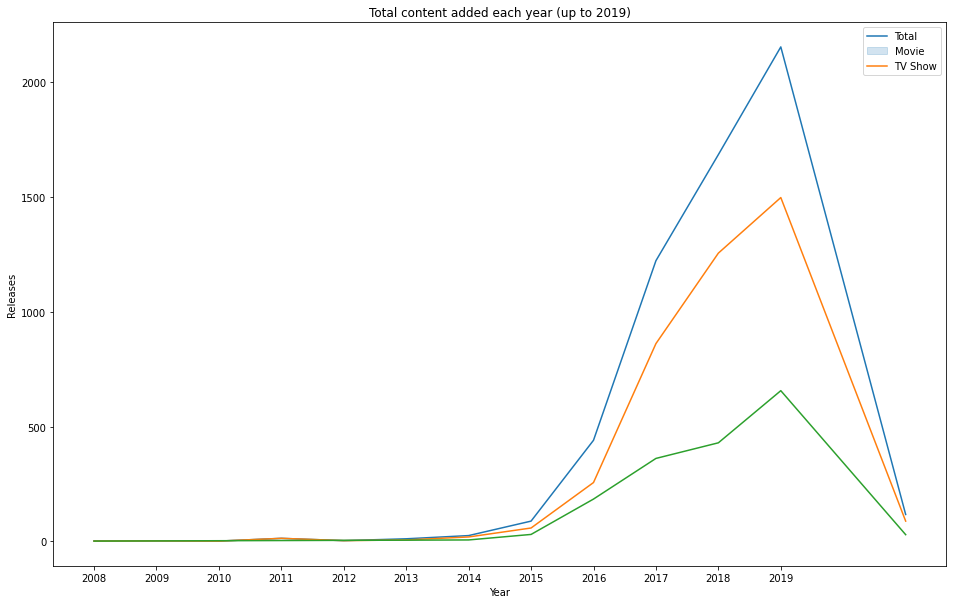

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Initially the number of movies and shows added were low but as time passed in year 2014 the count started incressing and attain its peak in 2019. 

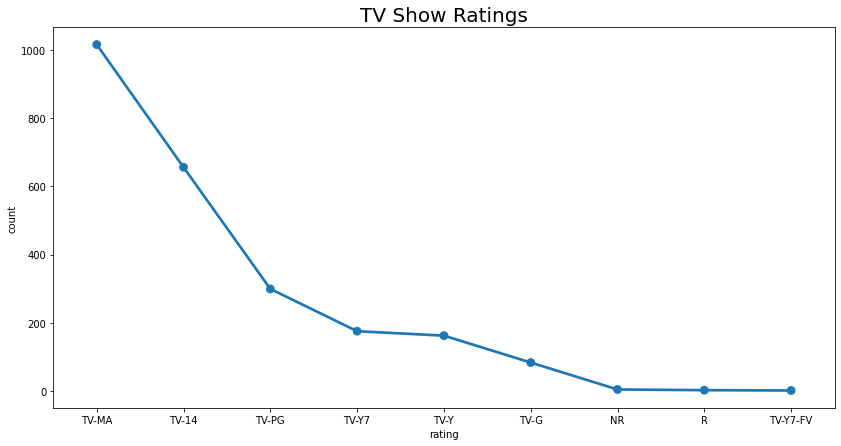

In [31]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()
     

  TV Show Rating shows that the count of TV-MA is highest followed by TV-14 then TV-PG then TV-Y7 then TV-Y then TV-G then NR then R then TV-Y7-FV.

In [32]:

#production_based_on_yearly_growth
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)



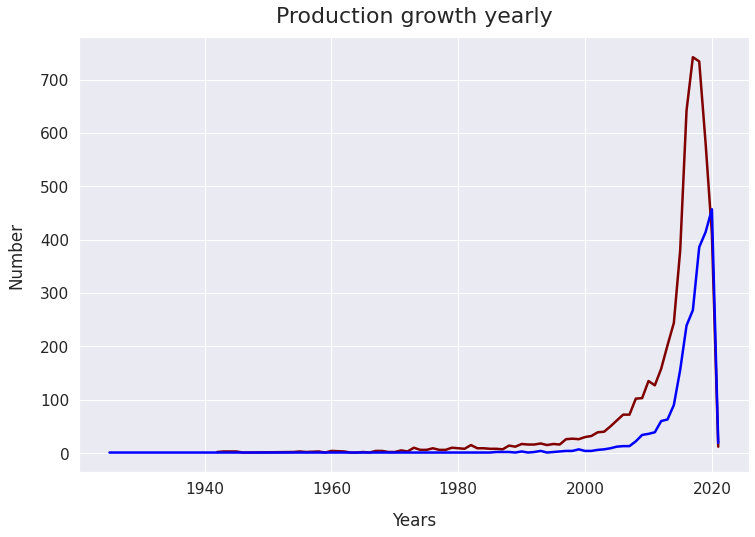

In [33]:
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

As the year passes the number of production increases and a boom  can be seen after the year 2000.

In [34]:
# Plotting the heatmap
new_netflix_df['count'] = 1
data = new_netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = new_netflix_df.loc[new_netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


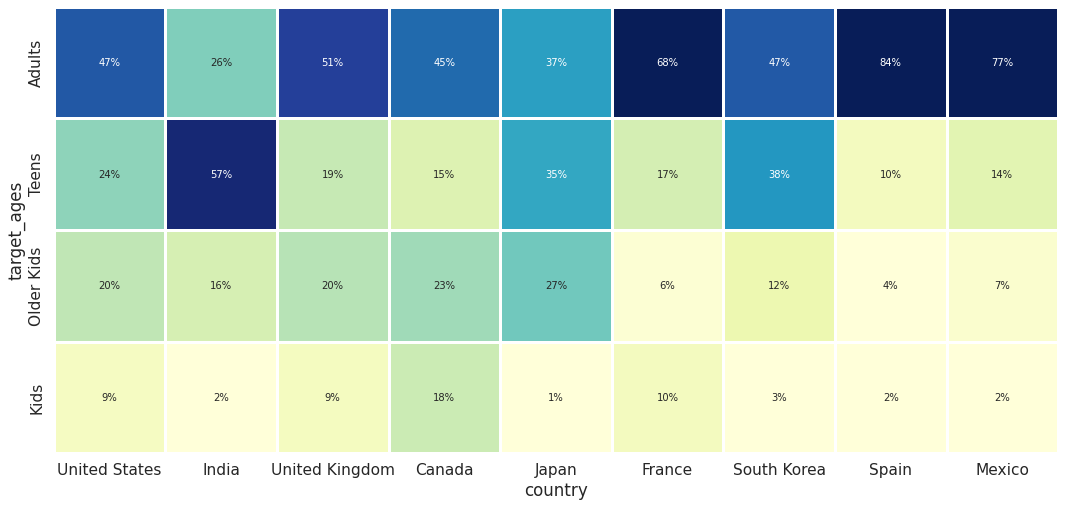

In [35]:

fig, ax = plt.subplots(1, 1, figsize=(18, 16))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=3,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":10})
plt.show()
     

From this heat map we get to know that in USA, United Kingdom, Canada, Japan,South Korea and Mexico has target age is adult but the target age of India is teen.But from this analysis we can conclude that major target area is teens and adults. So, the movies,tv series must  be made keeping in mind the flavour of these target  area. 

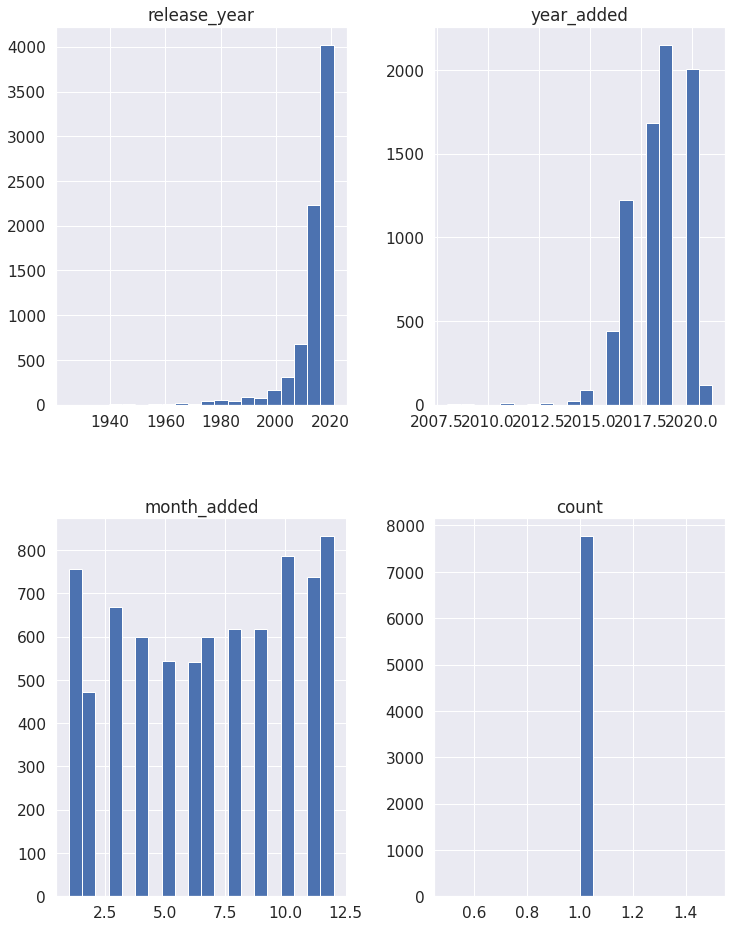

In [36]:
# histogram_showing_release_year,year_added,month_added,count
new_netflix_df.hist(bins = 20 , figsize= (12,16)) ;

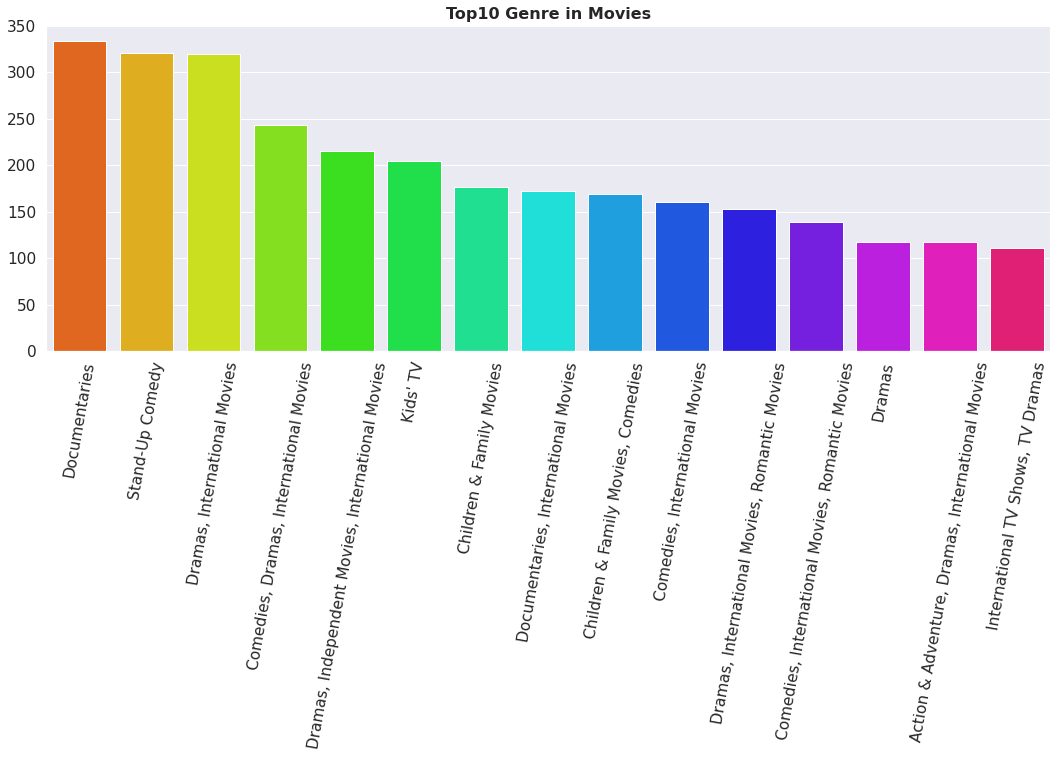

In [37]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

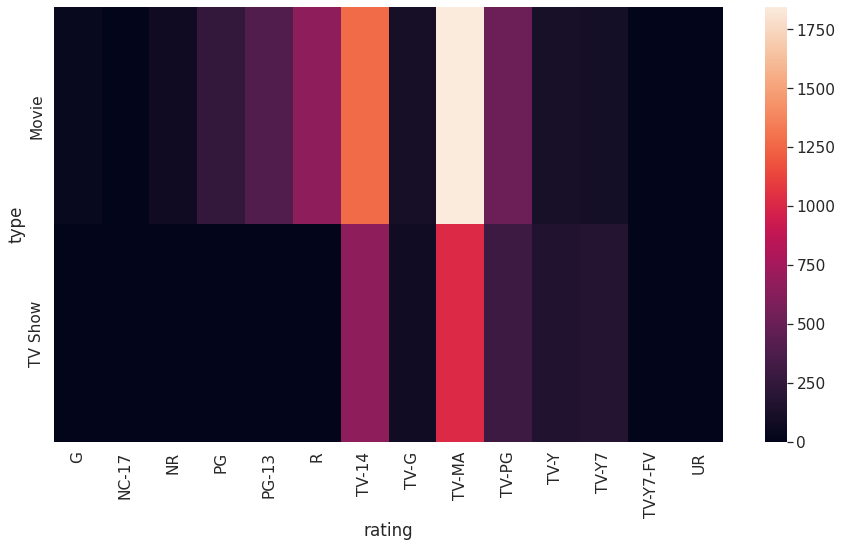

In [38]:
#Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(pd.crosstab(new_netflix_df["type"],new_netflix_df['rating']))
plt.show()

##**Word Cloud for Countries with the most content available**

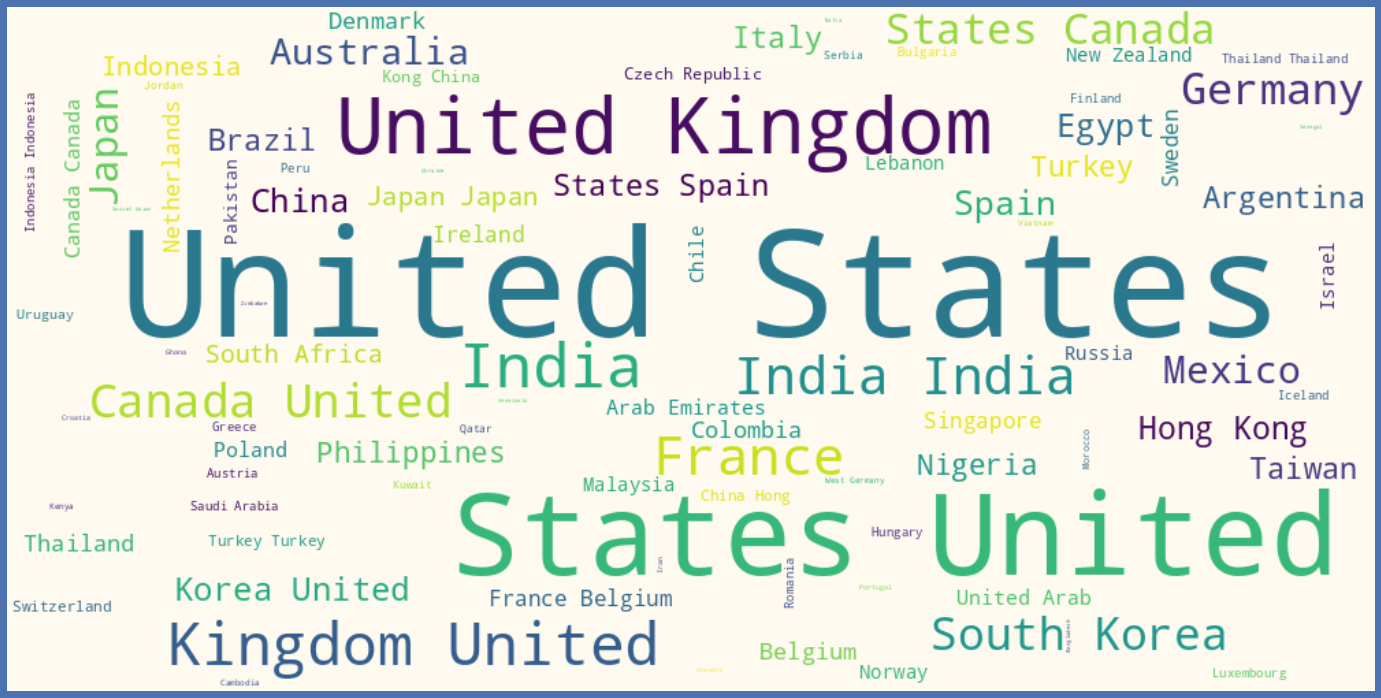

In [39]:
from wordcloud import WordCloud
fig = plt.figure(figsize=(20,10),facecolor = 'b',edgecolor = 'r')
wordcloud = WordCloud(background_color='floralwhite',width=1000, height=500 ).generate(" ".join(new_netflix_df.country))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('country.png')
plt.show()

Word cloud shows thatteh counties with most content available are United States, United Kingdom ,India, Canada, Germany

##**Word Cloud for Cast**

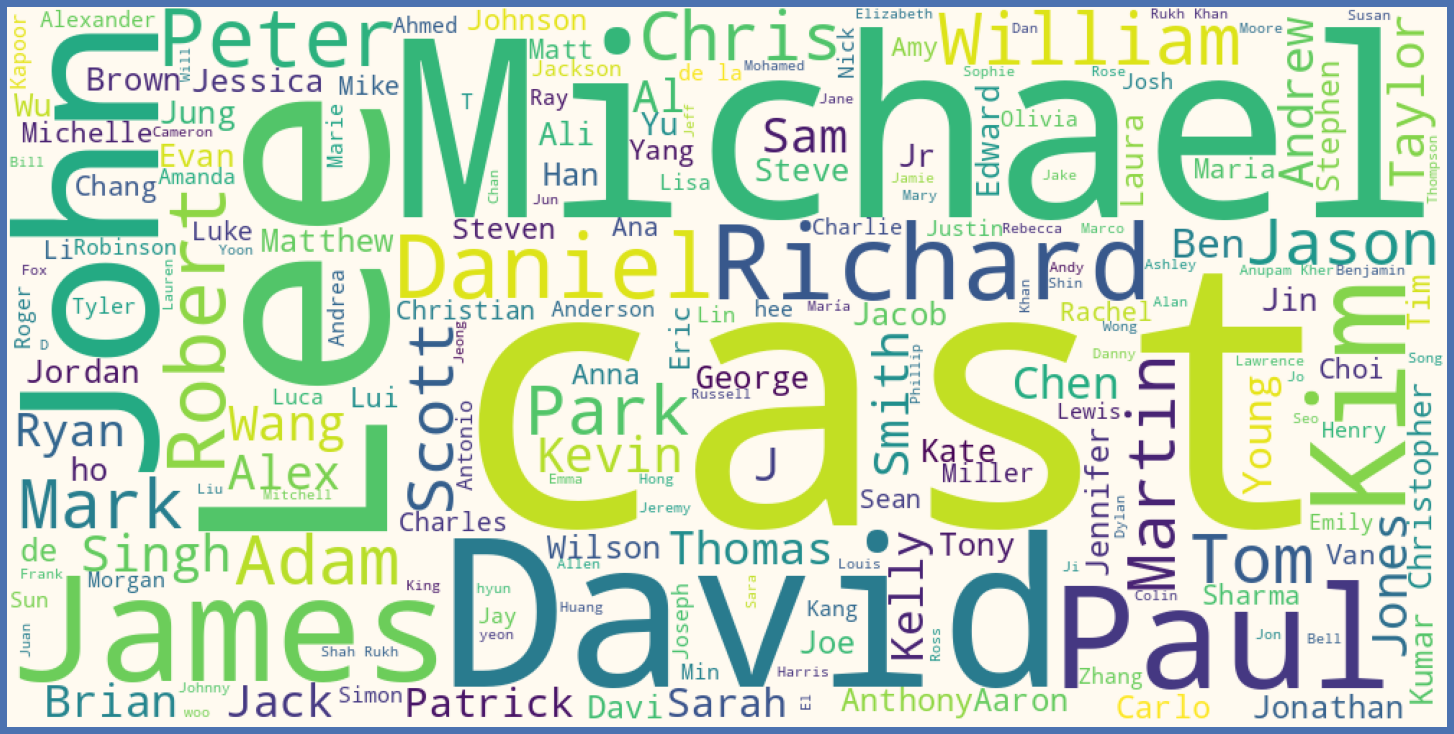

In [40]:

text = new_netflix_df['cast']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(new_netflix_df.cast))
fig = plt.figure(figsize = (20, 10),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#**ENCODING DATA [Transform column data to list so that we can do transformation in columns]**

In [41]:
netflix1=netflix_df.copy()
netflix2=netflix_df.copy()

In [42]:
# Fill missing country entries with United States o
netflix1['country'].fillna('United States',inplace=True)

# Filling missing values in the rest of columns with other
netflix1.fillna('Other', inplace=True)

In [43]:
# Change director, cast, country, and listed_in columns from type str to lists
netflix1.director = netflix1.director.str.split(', ').tolist()
netflix1.cast = netflix1.cast.str.split(', ').tolist()
netflix1.country = netflix1.country.str.split(', ').tolist()
netflix1.listed_in = netflix1.listed_in.str.split(', ').tolist()
     


In [44]:
netflix1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Other],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [45]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix1['director'].explode().unique()
all_cast = netflix1['cast'].explode().unique()
all_countries = netflix1['country'].explode().unique()
all_ratings = netflix1['rating'].unique()
all_genres = netflix1['listed_in'].explode().unique()


     

In [46]:
len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 121, 15, 42)

In [47]:
netflix1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [48]:
# Retain primary director, lead actor/actress, and primary country
for i in range(len(netflix1)):
  netflix1['director'][i] = netflix1['director'][i][0]
  netflix1['cast'][i] = netflix1['cast'][i][0]
  netflix1['country'][i] = netflix1['country'][i][0]
  i += 1

In [49]:
# Renaming the dataframe 
fea_reduced_df = netflix1.copy()
fea_reduced_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [50]:
# Importing the MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = fea_reduced_df.join(pd.DataFrame(mlb.fit_transform(fea_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=fea_reduced_df.index))

In [51]:

# Importing the one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to rating column
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_rating = pd.DataFrame(encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
encoded_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(encoded_rating)
     

In [52]:
# Installing the category encoder
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [53]:
# Importing the category encoders
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [54]:
# Droping the Columns befor applying clustering
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast',
                                              'country','rating','description',
                                              'date_added','show_id',
                                              'release_year','duration']
                                             , axis=1)
netflix_encoded_df.shape
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,3389
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,3389


#**Finding  value of k**

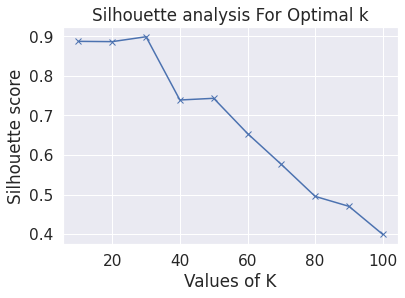

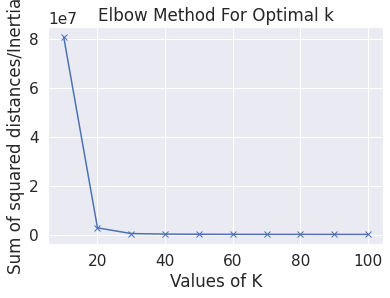

In [55]:

# Silhouette scores for different values of k And Elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters =[10,20,30,40,50,60,70,80,90,100]
silhouette_avg = []
Sum_of_squared_distances = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 kmeans.fit(netflix_encoded_df)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(netflix_encoded_df, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Elbow method

plt.plot(range_n_clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The optimal value of k is 20

#**Clusters implementation** 

In [56]:
# Applying the model
from sklearn.cluster import KMeans

# Create K-Means Model
modelkmeans = KMeans(n_clusters=20, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix2.insert(len(netflix2.columns), column = 'cluster', value = predictions_df.cluster)

In [57]:
# Checking the predictions
netflix2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,13
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,16
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,16
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",16
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,0
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4


#**Evaluation**

In [58]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 20, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(netflix_encoded_df) 

In [59]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(netflix_encoded_df, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.8865752533375184


<Axes: xlabel='cluster', ylabel='count'>

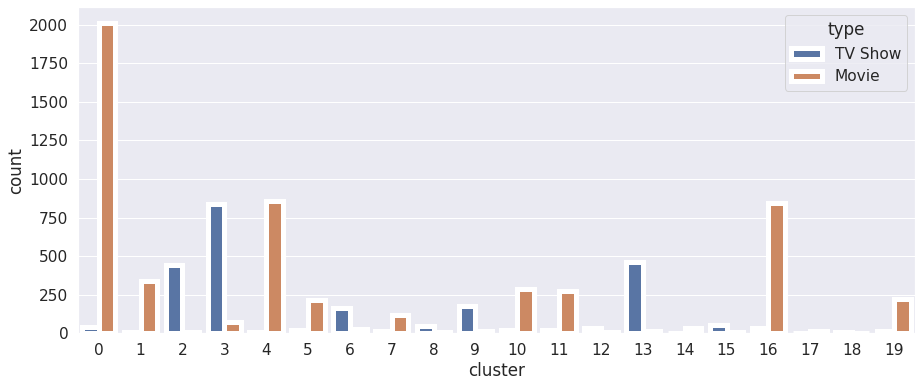

In [60]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=netflix2, ax=ax)

Cluster 1 has highest number of data points

#**Conclusion**

* From the analysis we done on the data set we get to know that the  Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially.
*  USA has high demand of consumption as well as production.

* Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we have to remove these value for the  analysis purpose.

* We have choosen  cast, country, genre, director, rating, and description as our cluster. 

* The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

*  From Elbow and Sillhoute score ,optimal of 20 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same in  kmean cluster 1 has the highest number of datapoints 

* The Sillhoutte score for k=20 is 0.886575253337518 which is a very good score.

